# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Andrea Micola Azwir
- **Email:** andreamicolaazwir@gmail.com
- **ID Dicoding:** andreamicola08

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda dipengaruhi oleh kondisi cuaca (seperti suhu, kelembaban, dan kecepatan angin)?
2. Apakah ada perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
# Import dataset day.csv
day_df = pd.read_csv('/content/day.csv')  # Sesuaikan path file jika diperlukan
day_df.head()  # Melihat beberapa baris pertama dari dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset yang digunakan adalah Bike Sharing Dataset, berisi data harian terkait penggunaan sepeda.
- Data ini memuat informasi mengenai suhu, kelembaban, kecepatan angin, serta jumlah total pengguna sepeda (baik yang casual maupun terdaftar) untuk setiap hari dalam dua tahun (2011-2012).

### Assessing Data

In [3]:
# Memeriksa tipe data dan missing values
day_df.info()
day_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Tidak ada nilai yang hilang di dataset. Setiap kolom memiliki jumlah data yang lengkap.
- Tipe data sudah sesuai untuk setiap kolom, misalnya kolom tanggal sebagai string (dapat diubah menjadi format datetime jika diperlukan), sedangkan variabel lainnya (seperti suhu, kelembaban, kecepatan angin) sudah dalam bentuk numerik yang siap dianalisis.

### Cleaning Data

**Insight:**
- Data sudah bersih dan tidak memerlukan pembersihan tambahan karena tidak ada missing values atau anomali lainnya.

## Exploratory Data Analysis (EDA)

### Explore ...

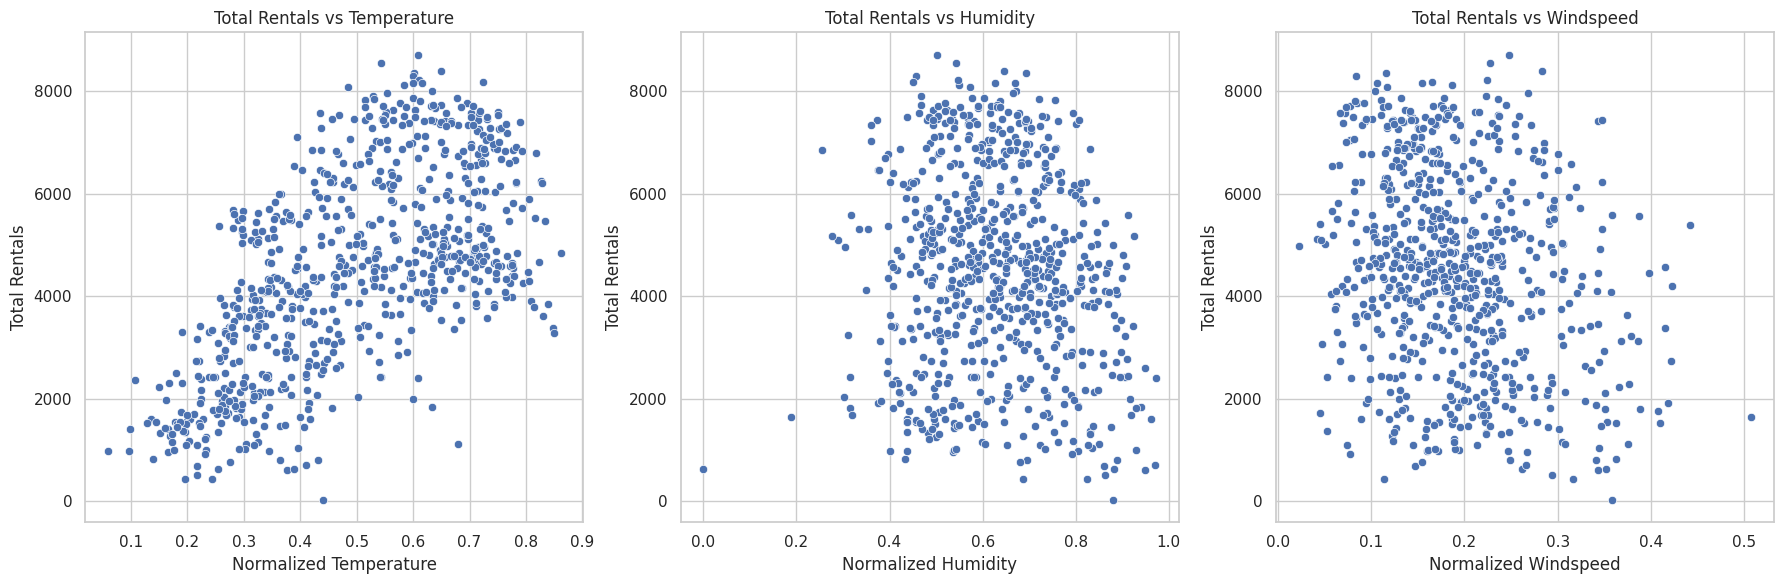

In [4]:
# Plotting the relationship between total bike rentals and weather conditions (temp, hum, windspeed)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Temperature vs total rentals
sns.scatterplot(ax=axes[0], x=day_df['temp'], y=day_df['cnt'])
axes[0].set_title('Total Rentals vs Temperature')
axes[0].set_xlabel('Normalized Temperature')
axes[0].set_ylabel('Total Rentals')

# Humidity vs total rentals
sns.scatterplot(ax=axes[1], x=day_df['hum'], y=day_df['cnt'])
axes[1].set_title('Total Rentals vs Humidity')
axes[1].set_xlabel('Normalized Humidity')
axes[1].set_ylabel('Total Rentals')

# Windspeed vs total rentals
sns.scatterplot(ax=axes[2], x=day_df['windspeed'], y=day_df['cnt'])
axes[2].set_title('Total Rentals vs Windspeed')
axes[2].set_xlabel('Normalized Windspeed')
axes[2].set_ylabel('Total Rentals')

plt.tight_layout()
plt.show()

**Insight:**
- Suhu (Temperature): Ada hubungan positif antara suhu dan penggunaan sepeda. Semakin tinggi suhu (hingga kisaran suhu yang nyaman), semakin banyak sepeda yang disewa. Puncak penggunaan terlihat pada suhu normalisasi sekitar 0.5-0.7.
- Kelembaban (Humidity): Tidak ada hubungan yang jelas antara kelembaban dan penggunaan sepeda, tetapi ada kecenderungan penurunan jumlah pengguna saat kelembaban sangat tinggi.
- Kecepatan Angin (Windspeed): Tidak terlihat adanya hubungan kuat antara kecepatan angin dan jumlah penggunaan sepeda. Penggunaan tetap stabil di berbagai level kecepatan angin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda dipengaruhi oleh kondisi cuaca (suhu, kelembaban, dan kecepatan angin)?

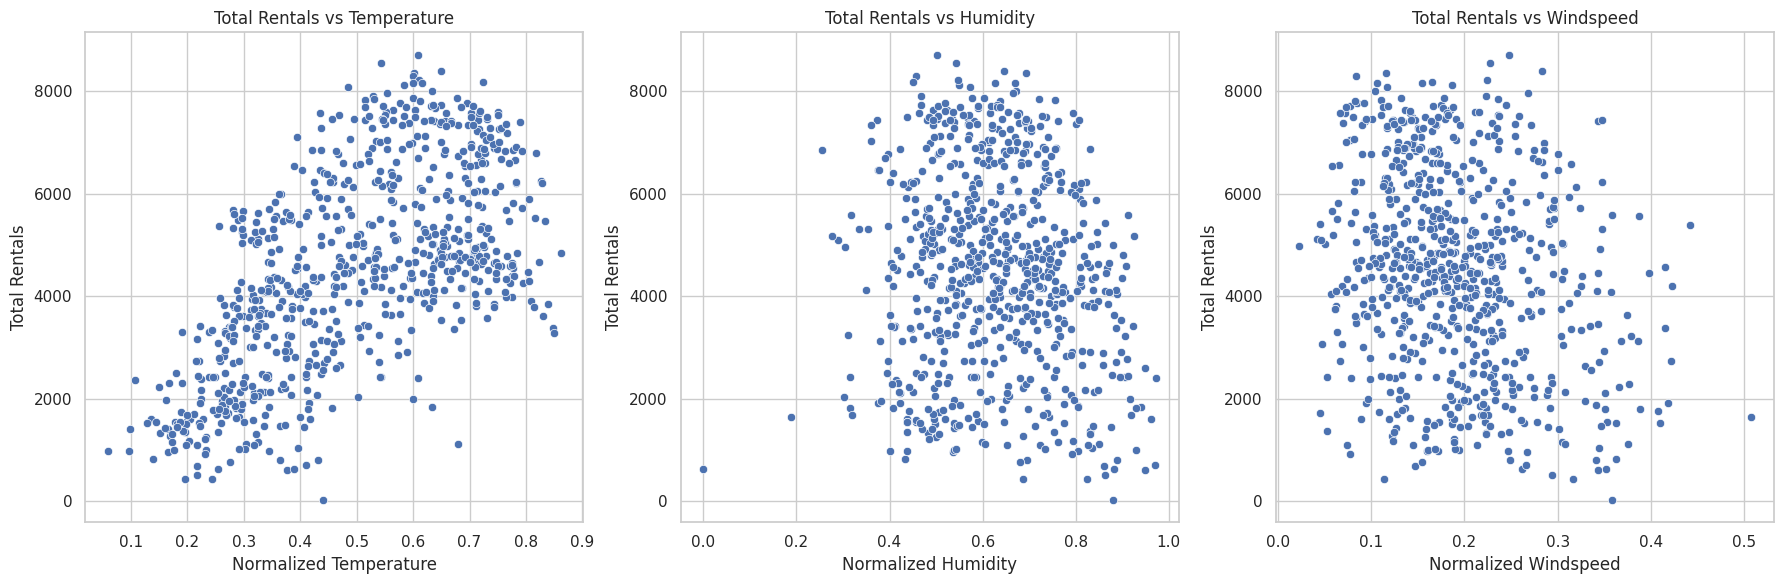

In [5]:
# Visualisasi pengaruh kondisi cuaca terhadap penggunaan sepeda
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Membuat plot untuk melihat hubungan antara cuaca dan penggunaan sepeda
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot untuk suhu (temperature) vs jumlah total rental sepeda
sns.scatterplot(ax=axes[0], x=day_df['temp'], y=day_df['cnt'])
axes[0].set_title('Total Rentals vs Temperature')
axes[0].set_xlabel('Normalized Temperature')
axes[0].set_ylabel('Total Rentals')

# Plot untuk kelembaban (humidity) vs jumlah total rental sepeda
sns.scatterplot(ax=axes[1], x=day_df['hum'], y=day_df['cnt'])
axes[1].set_title('Total Rentals vs Humidity')
axes[1].set_xlabel('Normalized Humidity')
axes[1].set_ylabel('Total Rentals')

# Plot untuk kecepatan angin (windspeed) vs jumlah total rental sepeda
sns.scatterplot(ax=axes[2], x=day_df['windspeed'], y=day_df['cnt'])
axes[2].set_title('Total Rentals vs Windspeed')
axes[2].set_xlabel('Normalized Windspeed')
axes[2].set_ylabel('Total Rentals')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()


### Pertanyaan 2: Apakah ada perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?

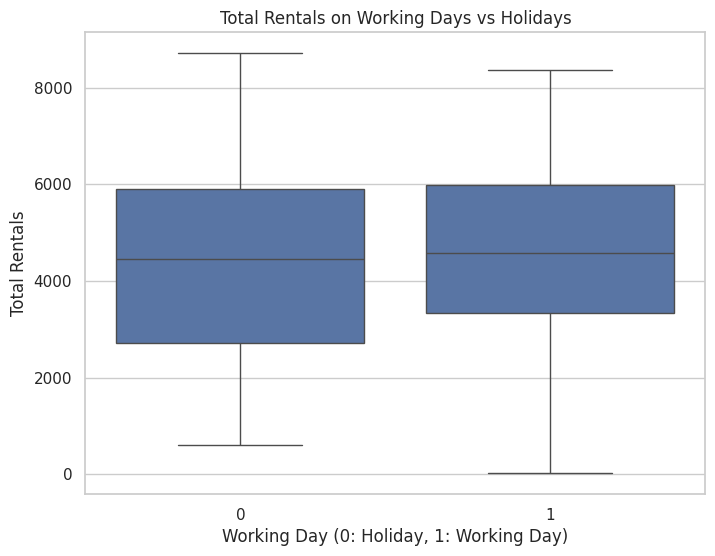

In [6]:
# Boxplot untuk hari kerja vs hari libur
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Total Rentals on Working Days vs Holidays')
plt.xlabel('Working Day (0: Holiday, 1: Working Day)')
plt.ylabel('Total Rentals')
plt.show()


**Insight:**
- Penggunaan sepeda pada hari kerja secara umum lebih tinggi dibandingkan dengan hari libur. Ini mungkin disebabkan oleh banyaknya penggunaan sepeda sebagai sarana transportasi harian untuk bekerja.
- Pada hari libur, penggunaan sepeda cenderung lebih rendah, meskipun masih ada variasi pengguna yang cukup besar pada beberapa hari tertentu.

## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan 1: Cuaca, terutama suhu, sangat memengaruhi penggunaan sepeda. Semakin nyaman suhu, semakin tinggi penggunaan sepeda. Kelembaban dan kecepatan angin tidak menunjukkan pengaruh yang signifikan.
- Pertanyaan 2: Ada perbedaan yang jelas antara penggunaan sepeda pada hari kerja dan hari libur, di mana penggunaan lebih tinggi pada hari kerja.